![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
import os
print('{0}'.format(os.getcwd()))

C:\Users\nazrin.n\Downloads\GreatLake Jupitor Notebooks\Course 10 Computer Vision


In [2]:
project_path  = "C:/Users/nazrin.n/Downloads/GreatLake Jupitor Notebooks/Course 10 Computer Vision/project2"
print(project_path)

C:/Users/nazrin.n/Downloads/GreatLake Jupitor Notebooks/Course 10 Computer Vision/project2


#### Change current working directory to project folder

In [3]:
os.chdir(project_path)
print('\nCurrent working directory chnaged to\n{0}'.format(os.getcwd()))


Current working directory chnaged to
C:\Users\nazrin.n\Downloads\GreatLake Jupitor Notebooks\Course 10 Computer Vision\project2


### Extract the zip file
- Extract Aligned Face Dataset from Pinterest.zip

In [4]:
import zipfile
with zipfile.ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [5]:
datasetpath = os.path.join(project_path, 'Aligned Face Dataset from Pinterest')
os.chdir(datasetpath)
print('\nCurrent working directory chnaged to\n{0}'.format(os.getcwd()))


Current working directory chnaged to
C:\Users\nazrin.n\Downloads\GreatLake Jupitor Notebooks\Course 10 Computer Vision\project2\Aligned Face Dataset from Pinterest


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [6]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file
#         print(base, name, file)

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [7]:
metadata.shape

(10770,)

### Define function to load image
- Define a function to load image from the metadata

In [8]:
import cv2
import matplotlib.pyplot as plt
print(os.getcwd())

def load_image(path):
#     print('load_image with ',path)
#     print('metadata[0].image_path()',metadata[0].image_path())
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

C:\Users\nazrin.n\Downloads\GreatLake Jupitor Notebooks\Course 10 Computer Vision\project2\Aligned Face Dataset from Pinterest


#### Load a sample image 
- Load one image using the function "load_image"

path2 PINS\pins_Aaron Paul\Aaron Paul0_262.jpg


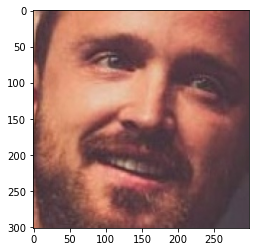

In [9]:
#### Add your code here ####
path2 = metadata[0].image_path()
print('path2',path2)
image = load_image(path2)
plt.imshow(image)
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model 
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [11]:
os.chdir(project_path)
print('\nCurrent working directory chnaged to\n{0}'.format(os.getcwd()))


Current working directory chnaged to
C:\Users\nazrin.n\Downloads\GreatLake Jupitor Notebooks\Course 10 Computer Vision\project2


In [12]:
model = vgg_face()#### Add your code here ####
#### Add your code here ####
model.load_weights('vgg_face_weights.h5')

## print model definition

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [14]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [15]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images 
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [16]:
metadata.shape[0]

10770

In [17]:
os.chdir(datasetpath)
print('\nCurrent working directory chnaged to\n{0}'.format(os.getcwd()))


Current working directory chnaged to
C:\Users\nazrin.n\Downloads\GreatLake Jupitor Notebooks\Course 10 Computer Vision\project2\Aligned Face Dataset from Pinterest


In [18]:
embeddings = np.zeros((metadata.shape[0], 2622))
print('embeddings[0] before',embeddings[0])
for i, m in enumerate(metadata):
  #### Add your code here ####
#     print('i, m', i, m)
    img_path = metadata[i].image_path()
#     print('img_path',img_path)
    img = load_image(img_path)

    # Normalising pixel values from range [0-255] to range[0-1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
#     print(img.shape)

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i] = (embedding_vector)

print('embeddings[0] after',embeddings[0])

embeddings[0] before [0. 0. 0. ... 0. 0. 0.]
embeddings[0] after [ 0.03170304 -0.0150513  -0.01243402 ...  0.00043139  0.00219081
 -0.00908097]


In [41]:
embeddings.shape

(10770, 2622)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [42]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

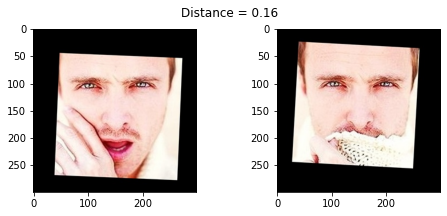

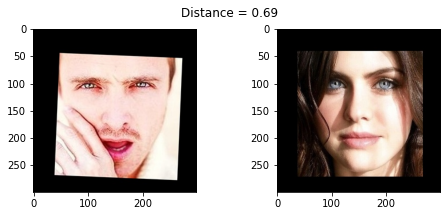

In [43]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

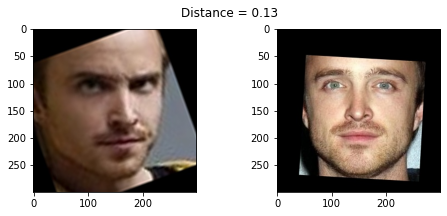

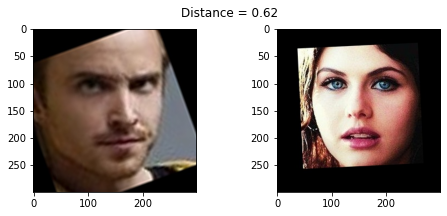

In [44]:
show_pair(30, 31)
show_pair(30, 100)

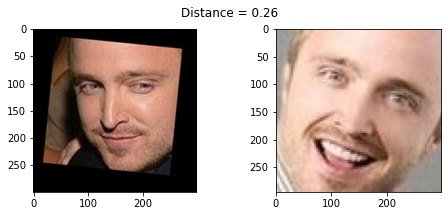

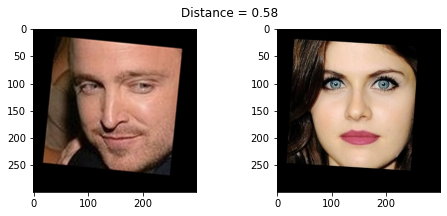

In [45]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [46]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0
print('train_idx, test_idx',train_idx, test_idx)
# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
#### Add your code here ####
y_test = targets[test_idx]

train_idx, test_idx [False  True  True ...  True  True  True] [ True False False ... False False False]


In [47]:
y_test.shape

(1197,)

In [48]:
X_test.shape

(1197, 2622)

In [49]:
targets.shape

(10770,)

### Encode the Labels 
- Encode the targets
- Use LabelEncoder

In [50]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
# creating labelencoder instance
label_encoder = LabelEncoder()
# # Assigning numerical values and storing in another column

y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)

In [51]:
y_train1

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

In [52]:
y_test1

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

### Standardize the feature values
- Scale the features using StandardScaler

In [53]:
# Print data lengths

print("\n Training data:",len(X_train))
print("\n Training Target data:",len(y_train))
print("\n Testing data:",len(X_test))
print("\n Testing Target data:",len(y_test))


 Training data: 9573

 Training Target data: 9573

 Testing data: 1197

 Testing Target data: 1197


In [54]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [55]:
X_train_scaled.shape

(9573, 2622)

In [56]:
X_test_scaled.shape

(1197, 2622)

### Reduce dimensions using PCA (5 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [57]:
from sklearn.decomposition import PCA
#### Add your code here ####
pca = PCA(n_components=128)
pca.fit(X_train_scaled)
print(pca.components_)
print(pca.explained_variance_ratio_)
Xpca = pca.transform(X_train_scaled)
Xpca_test = pca.transform(X_test_scaled)

[[-0.02388658  0.00862043 -0.00341474 ... -0.00802623  0.02108777
   0.03879666]
 [ 0.02041368 -0.00126856  0.00789221 ... -0.02338634 -0.00439965
   0.01097761]
 [ 0.00295589  0.00191406 -0.00756269 ...  0.01113672 -0.00111494
  -0.01617017]
 ...
 [-0.01360439  0.02023085  0.01624845 ... -0.02140168  0.0256476
   0.02517078]
 [ 0.01498143 -0.02119958 -0.01017617 ... -0.00749339 -0.00428762
  -0.01046409]
 [ 0.00177855  0.00984607  0.01471448 ...  0.03437406  0.01605438
   0.00257272]]
[0.13584168 0.0536451  0.03993747 0.03689942 0.03408946 0.03140591
 0.02575973 0.02349109 0.02100502 0.01929629 0.0181766  0.01699334
 0.01657656 0.01562287 0.01426342 0.01368786 0.01305143 0.01222493
 0.01149201 0.01133271 0.01088143 0.01063134 0.00966054 0.0094014
 0.00911942 0.0087863  0.0083591  0.00773467 0.00767259 0.00736168
 0.00703664 0.00656914 0.00633666 0.00623291 0.00567602 0.00536955
 0.00531394 0.00514555 0.00501931 0.0048585  0.00443702 0.0043073
 0.00398594 0.00393989 0.00370837 0.003551

In [58]:
Xpca

array([[-13.98882927,  17.47640545, -12.85120403, ...,   2.12077721,
          0.28551879,   0.60657389],
       [ -6.47306188,  17.1557354 ,  -9.26045511, ...,   0.35375369,
          1.09847729,  -0.47703277],
       [-17.96534342,   5.89982294,  -3.99006988, ...,   1.65135663,
         -1.55568548,   0.2416621 ],
       ...,
       [ 20.89175506, -21.41865218, -18.02519932, ...,   0.44294232,
          0.91196349,  -0.2478052 ],
       [ 16.98605571, -21.6309371 , -12.84349637, ...,  -1.09404469,
         -0.33082969,   0.28609016],
       [ 38.08743204, -17.88614853,   2.87656225, ...,  -1.80657039,
         -1.33600076,  -1.30870023]])

### Build a Classifier (5 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [59]:
from sklearn.svm import SVC

# #### Add your code here ####
classification_model = SVC(C=0.1,kernel='linear')
classification_model.fit(Xpca, y_train1)

SVC(C=0.1, kernel='linear')

In [60]:
model_score = classification_model.score(Xpca_test, y_test1)
print('classification_model Test Score',model_score)

classification_model Test Score 0.9573934837092731


## 'classification_model Test Score is ~96%'

In [61]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
y_predict = classification_model.predict(Xpca_test)
print(metrics.confusion_matrix(y_test1, y_predict))

[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 12]]


### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

metadata[test_idx][example_idx] PINS\pins_alexandra daddario\alexandra daddario101.jpg
(2622,)
example_prediction [63]


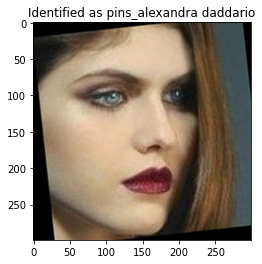

In [90]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())

#### Add your code here ####
print('metadata[test_idx][example_idx]', metadata[test_idx][example_idx])
embedding_vector = embeddings[test_idx][example_idx]
print(embedding_vector.shape)
embedding_vector = embedding_vector.reshape(1,2622)

transfomed_image = pca.transform(scalar.transform(embedding_vector))
example_prediction = classification_model.predict(transfomed_image)

example_identity = label_encoder.inverse_transform(example_prediction)[0]
print('example_prediction', example_prediction)
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

## Conclusion:

### Vgg descripter model is working quite well for generation of embedding and classification model is accurately detecting image when embeddings is used as input feature to map to target image